In [85]:
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave
import numpy as np
from numpy.random import randint

PROBLEM 1


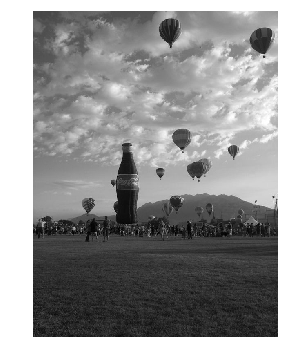

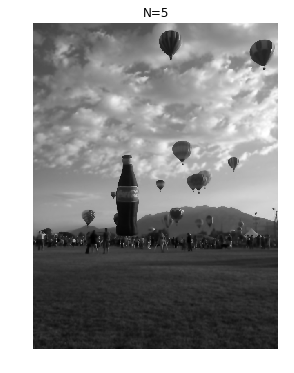

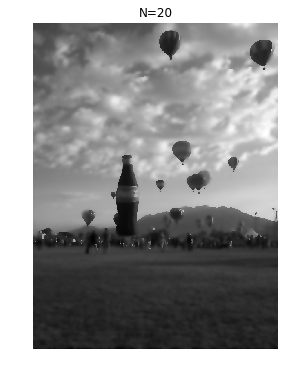

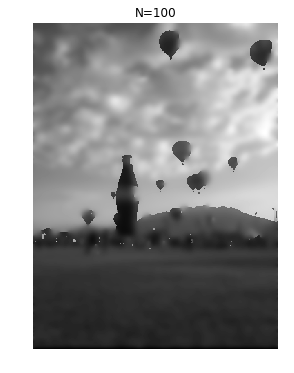

In [38]:
def anisdiff_bw(U, N, lambda_, g):
    m,n=np.shape(U)
    A=np.zeros(shape=(m+2,n+2))
    A[1:-1,1:-1]=U
    A[0]=A[1]
    A[1]=A[-2]
    A[:,0]=A[:,1]
    A[:,-1]=A[:,-2]
    U=A
    #print(A)
    for i in range(N):
        U[1:-1,1:-1]=U[1:-1,1:-1]+lambda_*(g(abs(U[0:-2,1:-1]-U[1:-1,1:-1]))*(U[0:-2,1:-1]-U[1:-1,1:-1])\
        +g(abs(U[2:,1:-1]-U[1:-1,1:-1]))*(U[2:,1:-1]-U[1:-1,1:-1])\
        +g(abs(U[1:-1,2:]-U[1:-1,1:-1]))*(U[1:-1,2:]-U[1:-1,1:-1])\
        +g(abs(U[1:-1,:-2]-U[1:-1,1:-1]))*(U[1:-1,:-2]-U[1:-1,1:-1]))
    plt.figure(figsize=(6,6))
    plt.imshow(U[1:-1,1:-1], cmap=cm.gray)
    plt.title("N="+str(N))
    plt.axis("off")
    plt.show()

print("PROBLEM 1")
picture=imread('balloon.png', flatten=True)*1/255
plt.figure(figsize=(6,6))
plt.imshow(picture, cmap=cm.gray)
plt.axis("off")
plt.show()
sigma=.1
g=lambda x: np.e**(-1*(x/sigma)**2)
anisdiff_bw(picture, 5,.25,g)
anisdiff_bw(picture, 20,.25,g)
anisdiff_bw(picture, 100, .25, g)

PROBLEM 2


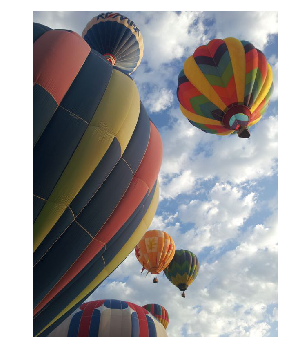

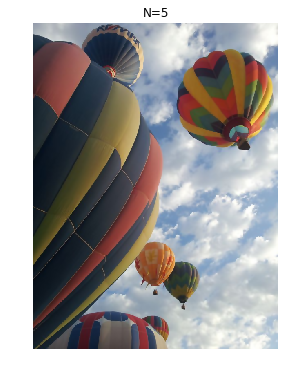

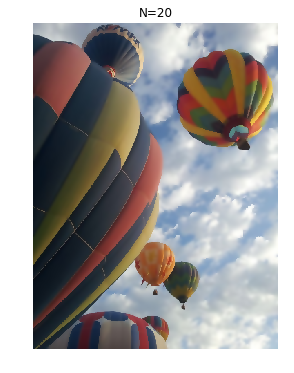

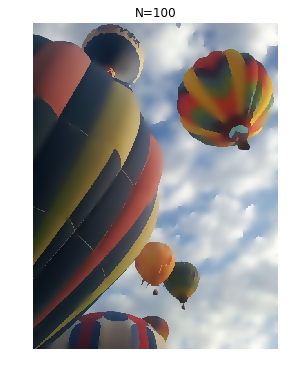

In [96]:
def anisdiff_color(U,N,lambda_,sigma):
    x,y,z=U.shape
    A=np.zeros(shape=(x+2,y+2,z))
    norm=lambda u: np.sqrt(np.sum(u**2,axis=2,keepdims=True))
    A[1:-1,1:-1,:]=U
    A[0]=A[1]
    A[1]=A[-2]
    A[:,0]=A[:,1]
    A[:,-1]=A[:,-2]
    U=A
    for i in range(N):
        U[1:-1,1:-1]=U[1:-1,1:-1]+lambda_*\
        (g(norm(U[0:-2,1:-1]-U[1:-1,1:-1]))*(U[0:-2,1:-1]-U[1:-1,1:-1])\
        +g(norm(U[2:,1:-1]-U[1:-1,1:-1]))*(U[2:,1:-1]-U[1:-1,1:-1])\
        +g(norm(U[1:-1,0:-2]-U[1:-1,1:-1]))*(U[1:-1,0:-2]-U[1:-1,1:-1])\
        +g(norm(U[1:-1,2:]-U[1:-1,1:-1]))*(U[1:-1,2:]-U[1:-1,1:-1]))
    plt.figure(figsize=(6,6))
    plt.imshow(U[1:-1,1:-1])
    plt.title("N="+str(N))
    plt.axis("off")
    plt.show()
    
print("PROBLEM 2")
picture=imread('balloons_color.png')*1./255
plt.figure(figsize=(6,6))
plt.imshow(picture)
plt.axis("off")
plt.show()
anisdiff_color(picture,5,.25,.1)
anisdiff_color(picture, 20,.25,.1)
anisdiff_color(picture,100,.25,.1)

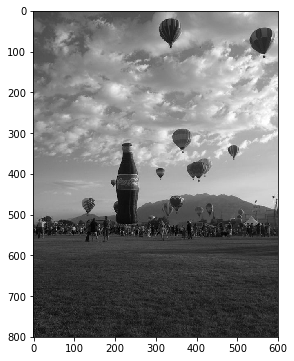

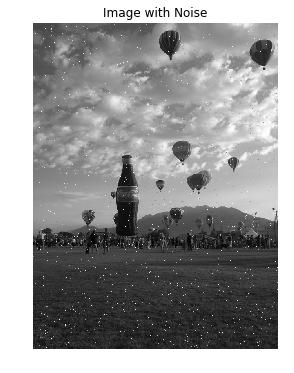

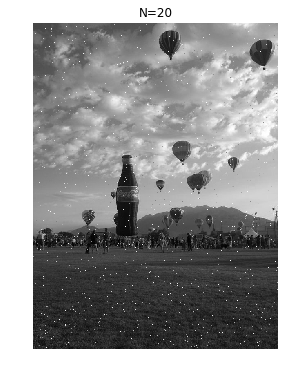

The contrast between the noise and the original image is sharp enough that it is being recognized as part of the image.


In [106]:
image=imread('balloon.png',flatten=True)
plt.figure(figsize=(6,6))
plt.imshow(image, cmap=cm.gray)
plt.show()
x,y=image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)]=127+randint(127)
plt.figure(figsize=(6,6))
plt.title("Image with Noise")
plt.imshow(image, cmap=cm.gray)
plt.axis("off")
plt.show()
sigma=.1
g=lambda x: np.e**(-1*(x/sigma)**2)
anisdiff_bw(image, 20,.25,g)
print("The contrast between the noise and the original image is sharp enough \
that it is being recognized as part of the image.")